###            **Business Case: Walmart - Confidence Interval & CLT**

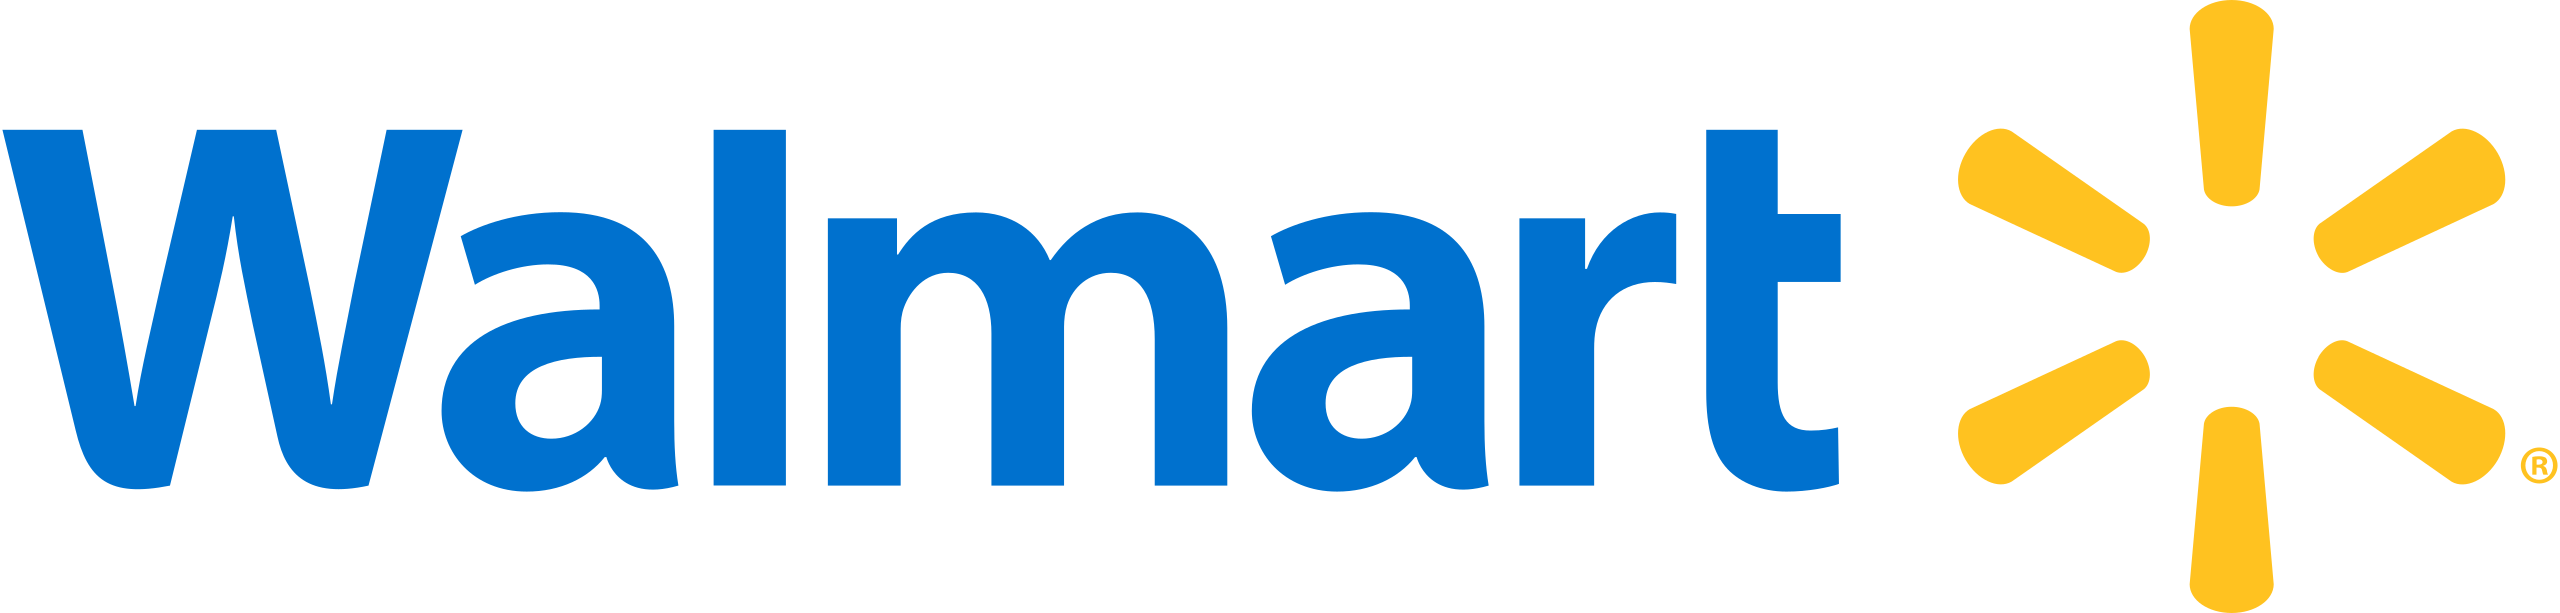


##About Walmart
Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

##Business Problem
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers - Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

##Columns info:-

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID: User ID

Product_ID: Product ID

Gender: Sex of User

Age: Age in bins

Occupation: Occupation(Masked)

City_Category: Category of the City (A,B,C)

StayInCurrentCityYears: Number of years stay in current city

Marital_Status: Marital Status

ProductCategory: Product Category (Masked)

Purchase: Purchase Amount

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing data
dataset_path = "/content/drive/MyDrive/Colab Notebooks/walmart.csv"
walmart_df = pd.read_csv(dataset_path)

# 1.1 Dataset Information

In [ ]:
# Reading dataframe
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
walmart_df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


## Shape of dataframe

In [ ]:
# Shape of the dataframe
walmart_df.shape

(550068, 10)

In [ ]:
# Name of each column in dataframe
walmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

## Datatypes of all attributes in dataframe

In [ ]:
# Datatype of each column in dataframe
walmart_df.dtypes # The dataframe has columns that need dtype "object". So we need to change it to "category."

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

## Conversion of attributes

In [ ]:
#cols = ['Occupation', 'Marital_Status', 'Product_Category']
#walmart_df[cols] = walmart_df[cols].astype('object')

In [ ]:
# Conveting object to Category
# cols1 = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
# walmart_df[cols1] = walmart_df[cols1].astype('category')

In [ ]:
walmart_df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
# Removing "+" symbol
walmart_df.Stay_In_Current_City_Years=walmart_df.Stay_In_Current_City_Years.str.replace("+","")

In [ ]:
walmart_df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [ ]:
# Conveting object to int
walmart_df["Stay_In_Current_City_Years"]=walmart_df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
# Let's drop the column User_ID
# walmart_df.drop(['User_ID'],axis=1,inplace=True)

In [ ]:
walmart_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


## Statistical Summary of dataframe

In [ ]:
walmart_df.skew()

User_ID                       0.003066
Occupation                    0.400140
Stay_In_Current_City_Years    0.317236
Marital_Status                0.367437
Product_Category              1.025735
Purchase                      0.600140
dtype: float64

In [ ]:
# Statistical Summary of dataframe
walmart_df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,3.000000,1.000000,8.000000,12054.000000


**Observations:**

- There are no missing values in the data.

- Customers with `age` group of `26-35` have done more purchases (`2,19,587`) compared with others
- Customers in `City_Category` of `B` have done more purchases (`2,31,173`) compared with other City_Category
- Out of 5,50,000 data point. 4,14,259's `gender` is Male and rest are the Female.
- Customer with Minimum amount of `Purchase` is 12 $

- Customer with Maximum amount of `Purchase` is 23961 $

- `Purchase` might have outliers

In [ ]:
# Statistical Summary of transpose of a dataframe
walmart_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068.0,NaN,NaN,NaN,1.858418,1.289443,0.0,1.0,2.0,3.0,4.0
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [ ]:
# Information of dataframe
walmart_df.info() # No null values detected in data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


In [ ]:
walmart_df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

In [ ]:
# Missing value detection
walmart_df.isna().sum() # No missing values detected in data frame

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
# Checking duplicate values in the data set
walmart_df.duplicated(subset=None,keep='first').sum() # No duplicate values in the data set

0

# 1.2 Non-Graphical Analysis: Value counts and unique attributes


## Value Counts

In [ ]:
walmart_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
# Exploring Value Count of each variable

print(walmart_df['User_ID'].value_counts())
print("**********************************************************************")
print(walmart_df['Product_ID'].value_counts())
print("**********************************************************************")
print(walmart_df['Gender'].value_counts())
print("**********************************************************************")
print(walmart_df["Age"].value_counts())
print("**********************************************************************")
print(walmart_df["Occupation"].value_counts())
print("**********************************************************************")
print(walmart_df["City_Category"].value_counts())
print("**********************************************************************")
print(walmart_df["Stay_In_Current_City_Years"].value_counts())
print("**********************************************************************")
print(walmart_df["Marital_Status"].value_counts())
print("**********************************************************************")
print(walmart_df["Product_Category"].value_counts())
print("**********************************************************************")
print(walmart_df["Purchase"].value_counts())

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
**********************************************************************
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
**********************************************************************
M    414259
F    135809
Name: Gender, dtype: int64
**********************************************************************
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
**********************************************************************
4     72308
0     69638
7     59133
1     47426
17    40043
20    33

In [ ]:
cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
walmart_df[cols].melt().groupby(['variable', 'value'])[['value']].count()/len(walmart_df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Occupation                 0      0.126599
                           1      0.086218
                           2      0.048336
                           3      0.032087
                           4      0.131453
                           5      0.022137
                           6      0.037005
                           7      0.107501
                           8      0.002811
                           9      0.011437
                           10     0.023506
                           11     0.021063
                           12     0.056682
                           13     0.014049
                           14     0.049647
                           15     0.022115
                           16     0.046123
                           17     0.072796
                           18     0.012039
                           19     0.015382
                           20     0.061014
Product_Category           1      0.255201
                           2      0.043384
                           3      0.036746
                           4      0.021366
                           5      0.274390
                           6      0.037206
                           7      0.006765
                           8      0.207111
                           9      0.000745
                           10     0.009317
                           11     0.044153
                           12     0.007175
                           13     0.010088
                           14     0.002769
                           15     0.011435
                           16     0.017867
                           17     0.001051
                           18     0.005681
                           19     0.002914
                           20     0.004636
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4      0.154028

**Observations:**
- ~ 80% of the users are between the `Age` group of 18-50 (40%: 26-35, 18%: 18-25, 20%: 36-45)
- In `Gender`, 75% of the customers are **Male** and 25% are **Female**
- In `Marital Status`,  60% are Single, 40% are Married
- In `Stay_In_Current_City_Years`, 35% Staying in the city since 1 year, 18% since 2 years, 17% since 3 years
- Total of 20 `product_categories` are there
- There are 20 differnent types of `Occupation`'s in the city

## Unique Attributes

In [ ]:
walmart_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
# Exploring Unique values of each variable

print("\nUnique Values of User_ID: ",walmart_df['User_ID'].unique())
print("\nUnique Values of Product_ID: ",walmart_df['Product_ID'].unique())
print("\nUnique Values of Gender: ",walmart_df['Gender'].unique())
print("\nUnique Values of Age: ",walmart_df["Age"].unique())
print("\nUnique Values of Occupation: ",walmart_df["Occupation"].unique())
print("\nUnique Values of City_Category: ",walmart_df["City_Category"].unique())
print("\nUnique Values of Stay_In_Current_City_Years: ",walmart_df["Stay_In_Current_City_Years"].unique())
print("\nUnique Values of Marital_Status: ",walmart_df["Marital_Status"].unique())
print("\nUnique Values of Product_Category: ",walmart_df["Product_Category"].unique())
print("\nUnique Values of Purchase: ",walmart_df["Purchase"].unique())


Unique Values of User_ID:  [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique Values of Product_ID:  ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique Values of Gender:  ['F' 'M']

Unique Values of Age:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique Values of Occupation:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique Values of City_Category:  ['A' 'C' 'B']

Unique Values of Stay_In_Current_City_Years:  [2 4 3 1 0]

Unique Values of Marital_Status:  [0 1]

Unique Values of Product_Category:  [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique Values of Purchase:  [ 8370 15200  1422 ...   135   123   613]


In [ ]:

# Exploring Unique values count of each variable

print("\nUnique Values of User_ID: ",walmart_df['User_ID'].nunique())
print("\nUnique Values of Product_ID: ",walmart_df['Product_ID'].nunique())
print("\nUnique Values of Gender: ",walmart_df['Gender'].nunique())
print("\nUnique Values of Age: ",walmart_df["Age"].nunique())
print("\nUnique Values of Occupation: ",walmart_df["Occupation"].nunique())
print("\nUnique Values of City_Category: ",walmart_df["City_Category"].nunique())
print("\nUnique Values of Stay_In_Current_City_Years: ",walmart_df["Stay_In_Current_City_Years"].nunique())
print("\nUnique Values of Marital_Status: ",walmart_df["Marital_Status"].nunique())
print("\nUnique Values of Product_Category: ",walmart_df["Product_Category"].nunique())
print("\nUnique Values of Purchase: ",walmart_df["Purchase"].nunique())


Unique Values of User_ID:  5891

Unique Values of Product_ID:  3631

Unique Values of Gender:  2

Unique Values of Age:  7

Unique Values of Occupation:  21

Unique Values of City_Category:  3

Unique Values of Stay_In_Current_City_Years:  5

Unique Values of Marital_Status:  2

Unique Values of Product_Category:  20

Unique Values of Purchase:  18105


# 1.3 Visual Analysis - Univariate & Bivariate

In [ ]:
walmart_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years     int64
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

## Univariate Analysis

*  Understanding the distribution of the data for the `quantitative` attributes:
  1. Occupation
  2. Stay_In_Current_City_Years
  3. Marital_Status
  4. Product_Category
  5. Purchase


### 1. Continuous variable(s):




####  **Distance Plot**

The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


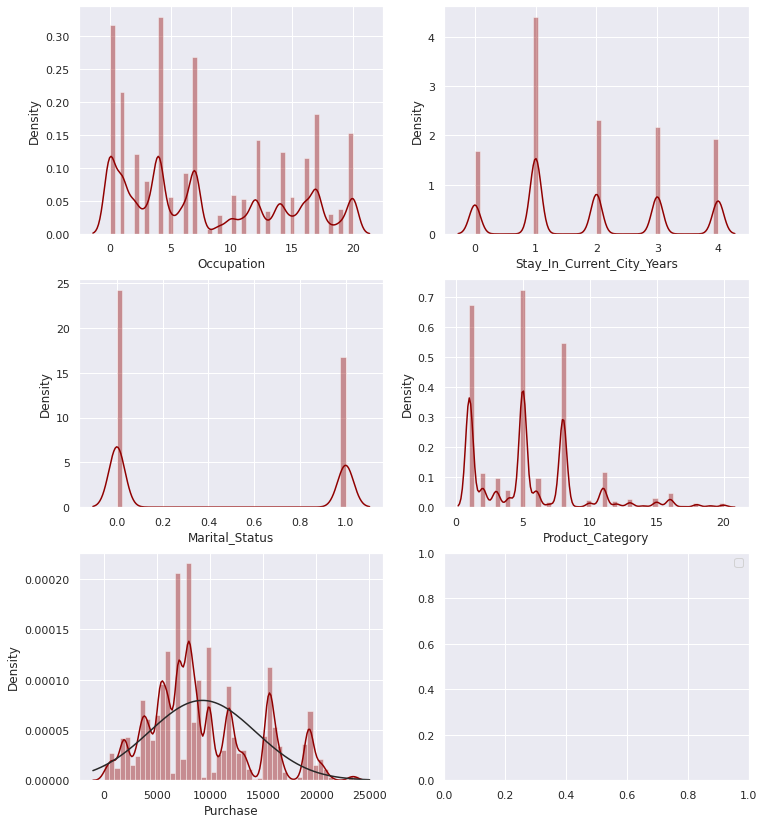

In [ ]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.distplot(walmart_df['Occupation'], kde=True, ax=axis[0,0], color="#900000")
sns.distplot(walmart_df['Stay_In_Current_City_Years'], kde=True, ax=axis[0,1], color="#900000")
sns.distplot(walmart_df['Marital_Status'], kde=True, ax=axis[1,0], color="#900000")
sns.distplot(walmart_df['Product_Category'], kde=True, ax=axis[1,1], color="#900000")
# sns.distplot(walmart_df['Purchase'], kde=True, ax=axis[2,0], color="#900000")
# plotting a distribution plot for the purchase variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(walmart_df['Purchase'],ax=axis[2,0], color = "#900000", fit = norm)
# fitting the target variable to the normal curve
mu, sigma = norm.fit(walmart_df['Purchase'])
print("The mu {} and Sigma {} for the curve".format(mu, sigma))
plt.legend(['Normal Distribution (: {}, : {}'.format(mu, sigma)], loc = 'best')
plt.show()

**Observations:**

- Most buyers have one year living in the city. Remaining categories are in uniform distribution

- In `Purchase` feature, first part of the graph `0 $ - 15,000 $` has a normal distribution and later forming some peaks in the graph. Evaluating the whole graph, it has a normal distribution

- From the `Marital_Status`, the frequency of buyers who are not married are more when compared to married one's.

- There are 20 different types of `Occupation` and `Product_Category`

- More Customers are `Single` as compare to `Married`

- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.


####  **Count Plot**

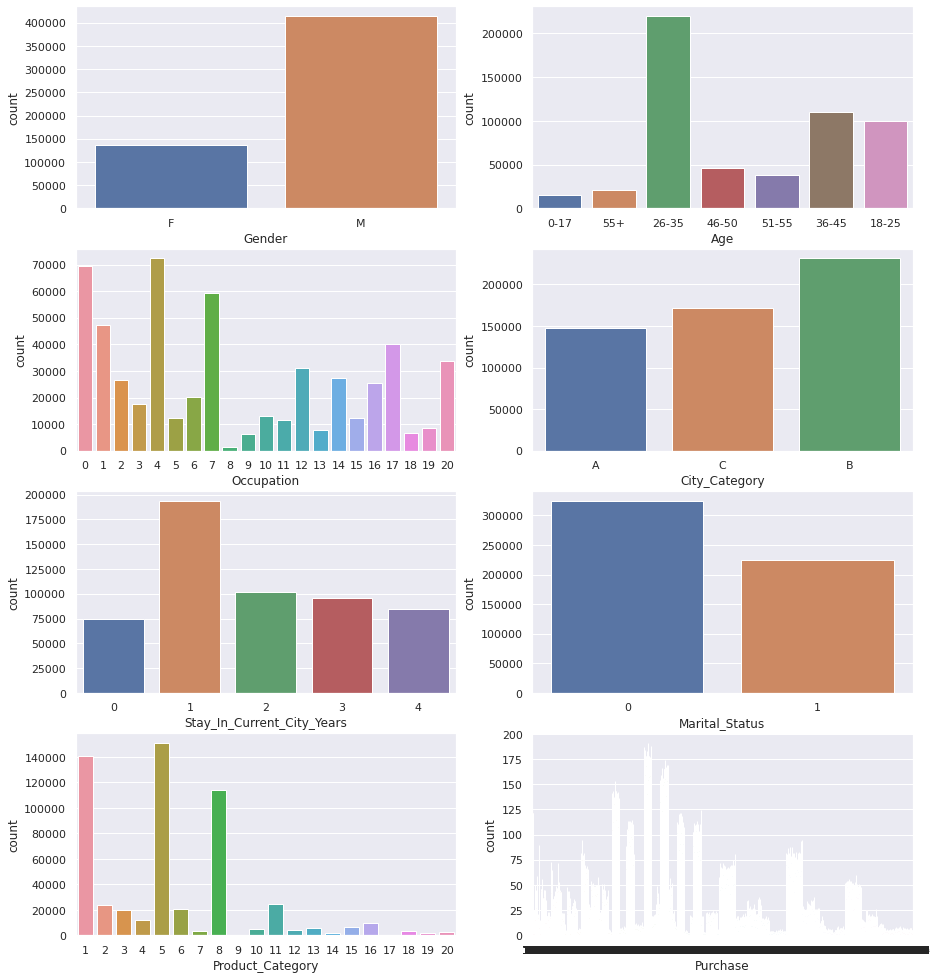

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
fig.subplots_adjust(top=1.2)


sns.countplot(walmart_df['Gender'], ax=axis[0,0])
sns.countplot(walmart_df['Age'], ax=axis[0,1])
sns.countplot(walmart_df['Occupation'], ax=axis[1,0])
sns.countplot(walmart_df['City_Category'], ax=axis[1,1])
sns.countplot(walmart_df['Stay_In_Current_City_Years'], ax=axis[2,0])
sns.countplot(walmart_df['Marital_Status'], ax=axis[2,1])
sns.countplot(walmart_df['Product_Category'], ax=axis[3,0])
sns.countplot(walmart_df['Purchase'], ax=axis[3,1])
'''
axis[0,0].set_title("Occupation - counts", pad=10, fontsize=14)
axis[0,1].set_title("Stay_In_Current_City_Years - counts", pad=10, fontsize=14)
axis[1,0].set_title("Mar ital_Status - counts", pad=10, fontsize=10)
axis[1,0].set_title("Product_Category - counts", pad=10, fontsize=10)
axis[2,0].set_title("Purchase - counts", pad=10, fontsize=10)
'''
plt.show()

**Observations:**

- Many buyers are `male` while the minority are `female`. Difference is due to the categories on sale during Black Friday, evaluating a particular category may change the count between genders.

- There are `7 categories` defined to classify the age of the buyers

- Majority of the buyers are `single`

- Display of the occupation of the buyers. `Occupation` 8 has extremely low count compared with the others; it can be ignored for the calculation since it won't affect much the result.

- Majority of the products are in category 1, 5 and 8. The low number categories can be combined into a single category to greatly reduce the complexity of the problem.

- Higher count might represent the urban area indicates more population in `City_Category`.

- Most buyers have one year living in the city. Remaining categories are in uniform distribution




####   **Histogram**

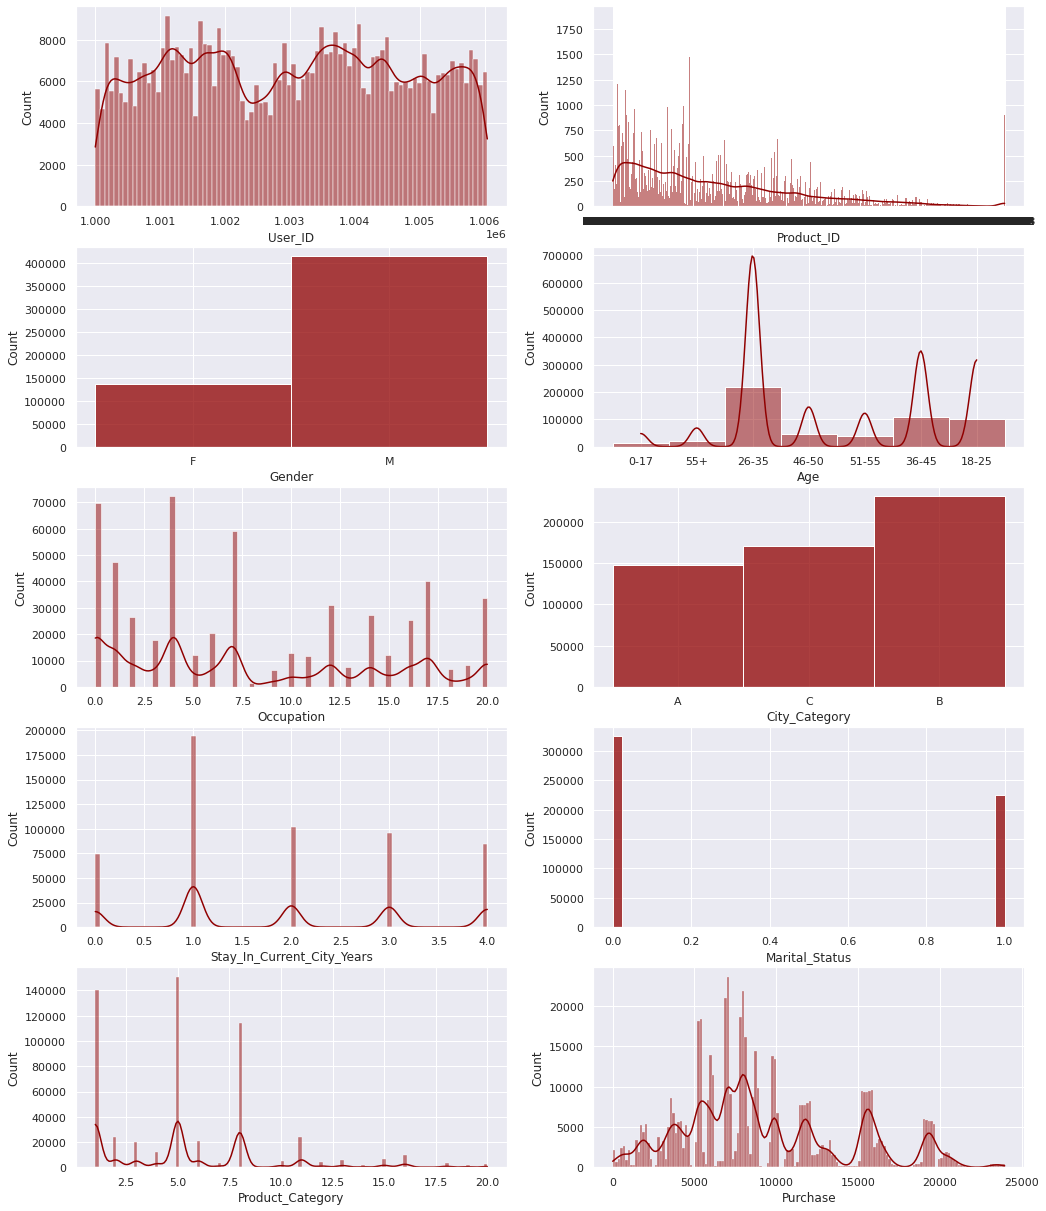

In [ ]:
fig, axis = plt.subplots(nrows=5, ncols=2, figsize=(17, 15))
fig.subplots_adjust(top=1.2)

sns.histplot(walmart_df['User_ID'], kde=True, ax=axis[0,0], color="#900000")
sns.histplot(walmart_df['Product_ID'], kde=True, ax=axis[0,1], color="#900000")
sns.histplot(walmart_df['Gender'], ax=axis[1,0], color="#900000")
sns.histplot(walmart_df['Age'], kde=True, ax=axis[1,1], color="#900000")
sns.histplot(walmart_df['Occupation'], kde=True, ax=axis[2,0], color="#900000")
sns.histplot(walmart_df['City_Category'], ax=axis[2,1], color="#900000")
sns.histplot(walmart_df['Stay_In_Current_City_Years'], kde=True, ax=axis[3,0], color="#900000")
sns.histplot(walmart_df['Marital_Status'], ax=axis[3,1], color="#900000")
sns.histplot(walmart_df['Product_Category'], kde=True, ax=axis[4,0], color="#900000")
sns.histplot(walmart_df['Purchase'], kde=True, ax=axis[4,1], color="#900000")

plt.show()

**Observations:**

- Most buyers have one year living in the city. Remaining categories are in uniform distribution

- In `Purchase` feature, first part of the graph `0 $ - 15,000 $` has a normal distribution and later forming some peaks in the graph. Evaluating the whole graph, it has a normal distribution

- From the `Marital_Status`, the frequency of buyers who are not married are more when compared to married one's.


### 2. Categorical variable(s):

*  Understanding the distribution of the data for the `qualitative` attributes:
  1. Product_ID
  2. Gender
  3. Age
  4. City_Category


####  **Box Plot**

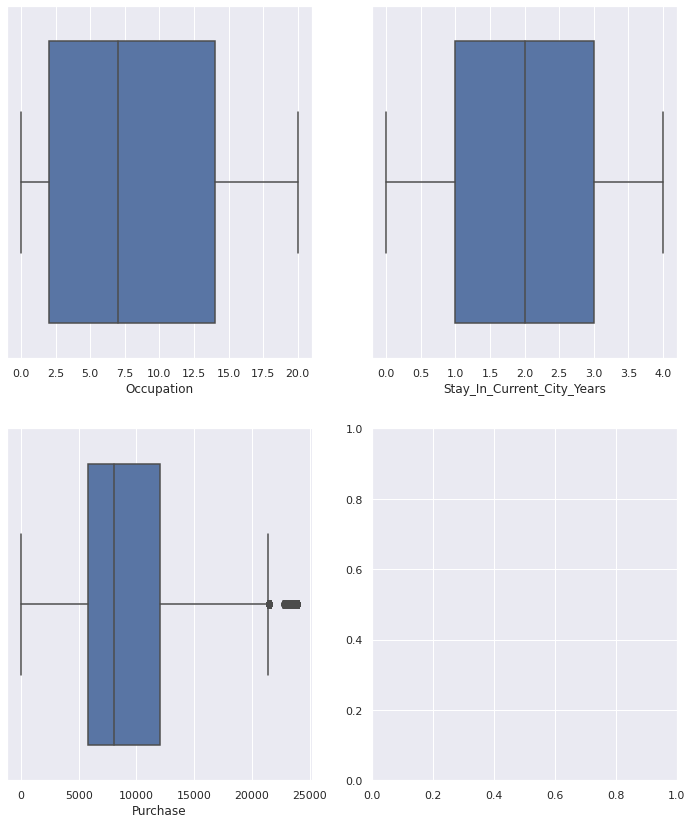

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=walmart_df, x="Occupation", ax=axis[0,0])
sns.boxplot(data=walmart_df, x="Stay_In_Current_City_Years", orient='h', ax=axis[0,1])
sns.boxplot(data=walmart_df, x="Purchase", orient='h', ax=axis[1,0])


plt.show()

**Obervations:**

- `Occupation`, `Stay_In_Current_City_Years` are not having outliers.

- The Customers `Purchase` attribute has an average of `~9000`.

- The `Purchase` attribute has few outliers

####  **Count Plot**

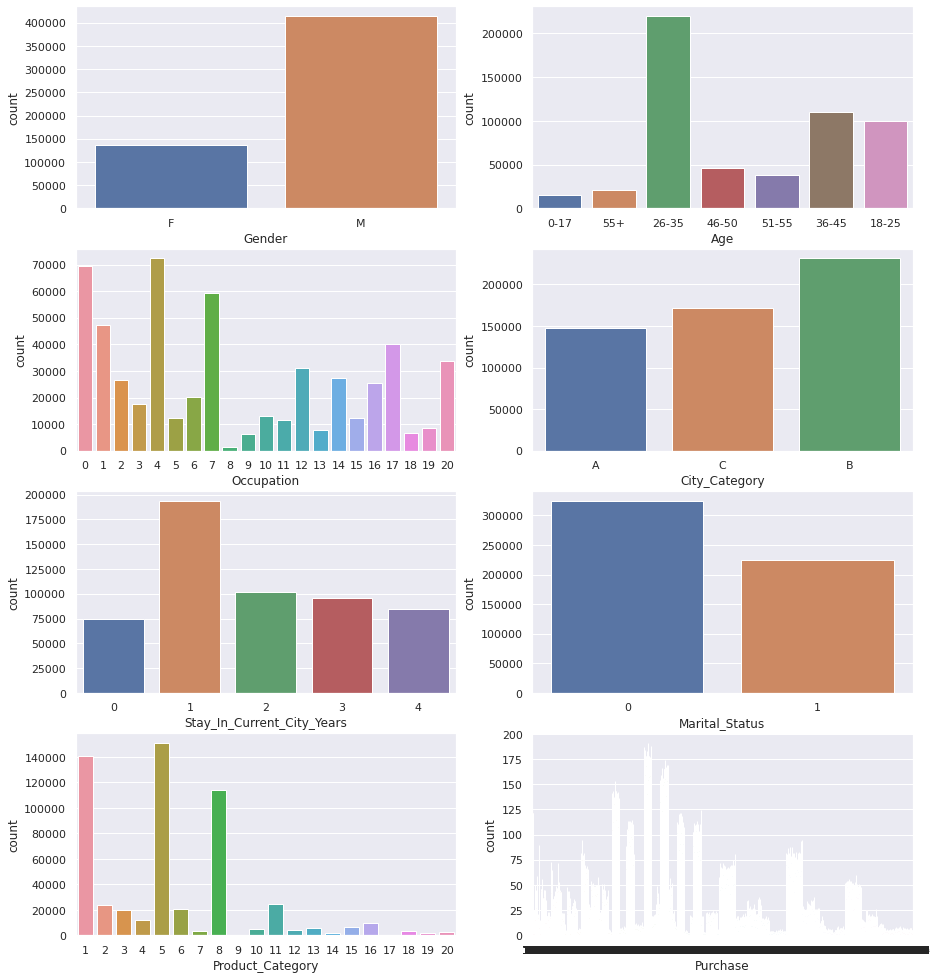

In [ ]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
fig.subplots_adjust(top=1.2)


sns.countplot(walmart_df['Gender'], ax=axis[0,0])
sns.countplot(walmart_df['Age'], ax=axis[0,1])
sns.countplot(walmart_df['Occupation'], ax=axis[1,0])
sns.countplot(walmart_df['City_Category'], ax=axis[1,1])
sns.countplot(walmart_df['Stay_In_Current_City_Years'], ax=axis[2,0])
sns.countplot(walmart_df['Marital_Status'], ax=axis[2,1])
sns.countplot(walmart_df['Product_Category'], ax=axis[3,0])
sns.countplot(walmart_df['Purchase'], ax=axis[3,1])

#axis[0,0].set_title("Occupation - counts", pad=10, fontsize=14)
#axis[0,1].set_title("Stay_In_Current_City_Years - counts", pad=10, fontsize=14)
#axis[1,0].set_title("Marital_Status - counts", pad=10, fontsize=10)
#axis[1,0].set_title("Product_Category - counts", pad=10, fontsize=10)
#axis[2,0].set_title("Purchase - counts", pad=10, fontsize=10)

plt.show()

#plt.figure(figsize=(10, 8))
#sns.countplot(walmart_df['Age'], ax=axis[2,0], color="#900000")
#plt.show()





**Obervations**

- Most of the Customers are `Male`
- There are 20 different types of `Occupation` and `Product_Category`
- More Customers belong to `B` in `City_Category`
- More Customers are `Single` as compare to `Married`
- `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

## Bivariate Analysis

*  Understanding the distribution of the data for the `quantitative` attributes:
  1. Occupation
  2. Stay_In_Current_City_Years
  3. Marital_Status
  4. Product_Category
  5. Purchase


#### **Checking if following attributes have any effect on the `Purchase` attribute**
  1. Gender
  2. Age
  3. Occupation
  4. City_Category
  5. Stay_In_Current_City_Years
  6. Marital_Status
  7. Product_Category

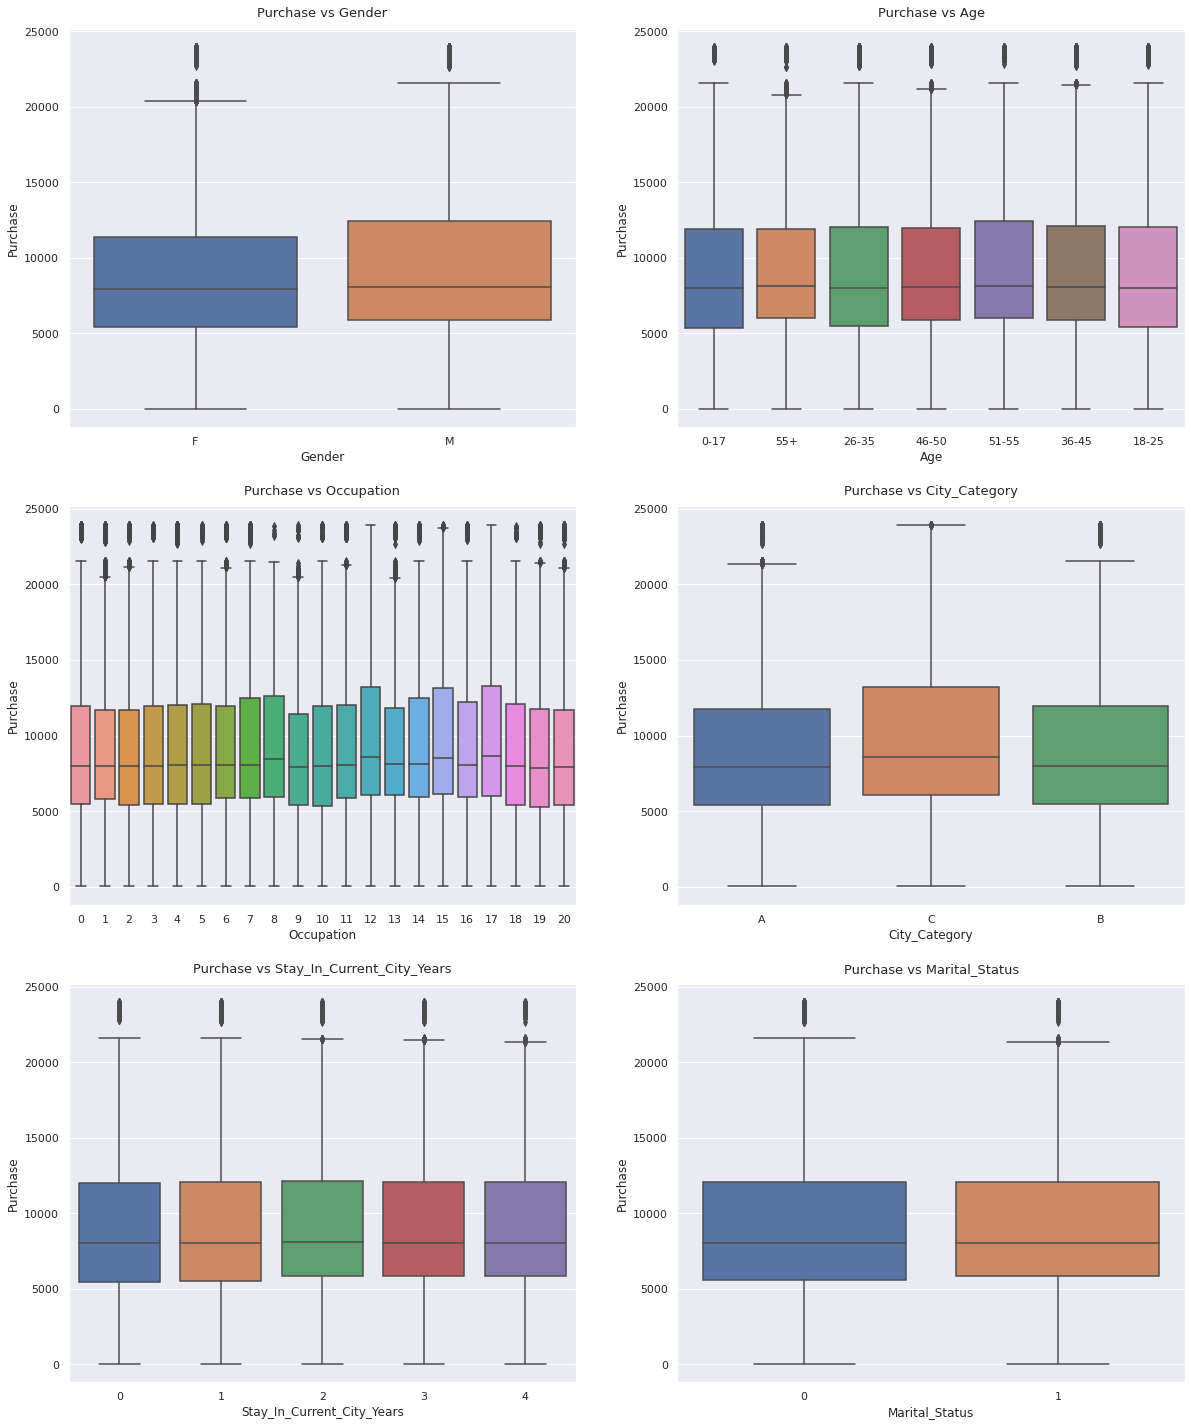

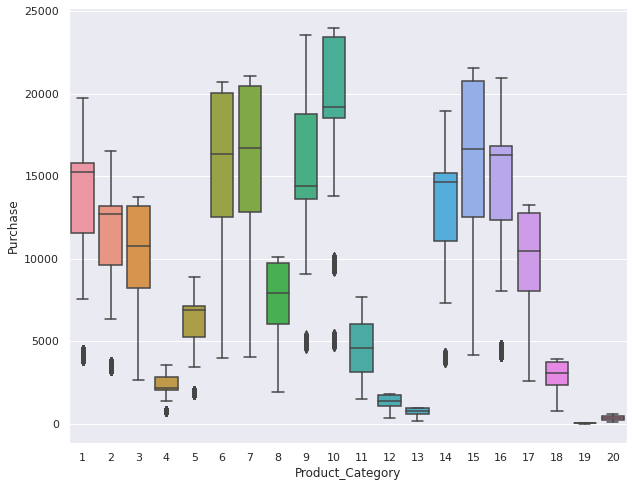

In [ ]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 16))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=walmart_df, y='Purchase', x=attrs[count], ax=axs[row, col])
        axs[row,col].set_title(f"Purchase vs {attrs[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=walmart_df, y='Purchase', x=attrs[-1])
plt.show()

**Observations:**

1. **`Product vs Gender`**
    * Uniform distribution but with a little difference.


2. **`Purchase vs Age`**
    * Age and Purchase attributes has a uniform distribution.
    
    
3. **`Purchase vs City_Category`**
    * Here we can see that customers from City C were the most frequent shoppers on Black Friday sales but Customers from City B had the highest amount of total purchases as we found that in our Count plot.

4. **`Purchase vs Marital_Status`**
    * At least the variable Marital Status seems to be a viable predictor for men, although the relative difference in amount is small. We came to know that Single Men spend the most during the Black Friday. It also tells that Men tend to spend less once they are married. It maybe because of the added responsibilities.


5. **`Purchase vs Product_Category`**
    * Total of 20 `product_categories` are there. `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

## Multivariate Analysis:

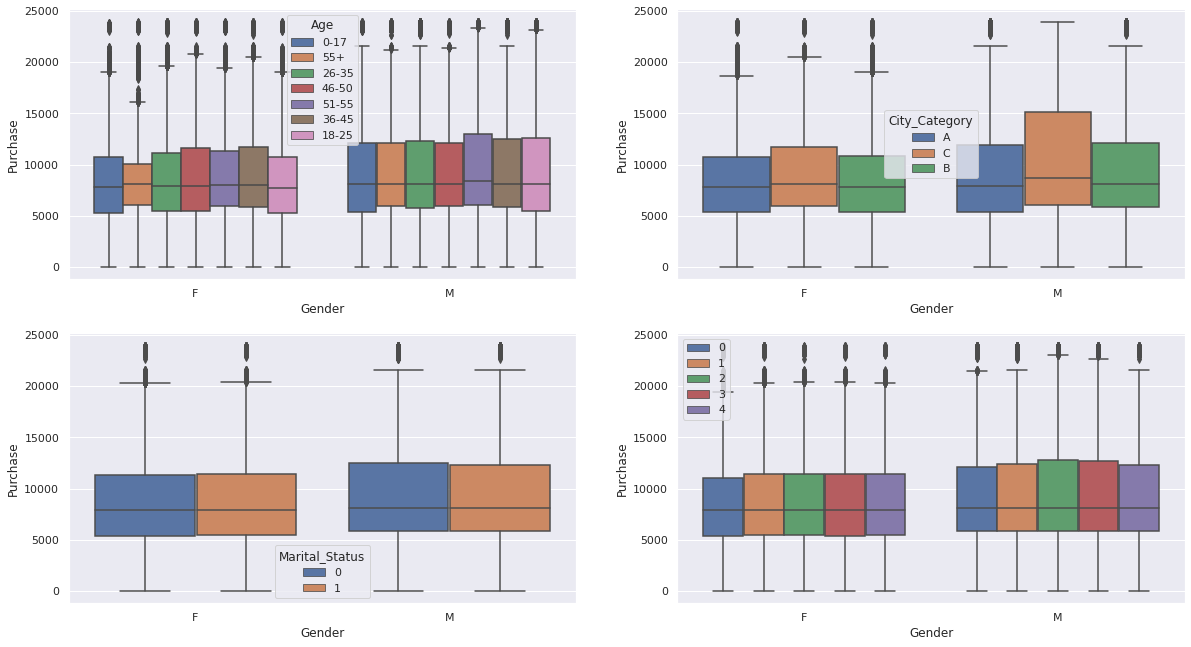

In [ ]:
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))

fig.subplots_adjust(top=1.5)
sns.boxplot(data=walmart_df, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=walmart_df, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=walmart_df, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=walmart_df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

**Obervations**

- Now, on plotting a Box plot for `Gender Vs Purchase`, seems like the majority of the population in the ages group 26-35 attended the sale.

- Most of the transactions were made by men.
- Age group with most transactions was 26-35.
- Here we can see that married men buy _less_ and women have roughly the same purchase amount regardless of being married or unmarried. So apparently in this case the bias that married  men have to spend more for their spouses is untrue, at least for purchases from this company. Or maybe they can buy less here because they have to spend more money on other things once they are married? We'll never know. At least the variable Marital Status seems to be a viable predictor for men, although the relative difference in amount is small. We can also see something more significant: men spend more than women in total amount!
- Men and women from City Category C spend more compared to the other categories. Men from that category spend significantly more than women from that category and men in general spend more than women.
- Stay in the current city is almost uneventful for women. Only when they first arrive will they spend less than in the following years.For men, it's up and down with two years resulting in most spending.





### 3. Correlation:

*  Understanding the relationship of the data for the correlated attributes:


In [ ]:
walmart_df.cov()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
User_ID,2.984573e+06,-270.113921,-68.470253,17.367619,26.008008,4.092159e+04
Occupation,-2.701139e+02,42.545100,0.252356,0.077882,-0.195578,6.825547e+02
Stay_In_Current_City_Years,-6.847025e+01,0.252356,1.662662,-0.008129,-0.021384,3.511996e+01
Marital_Status,1.736762e+01,0.077882,-0.008129,0.241838,0.038497,-1.144629e+00
Product_Category,2.600801e+01,-0.195578,-0.021384,0.038497,15.493760,-6.795650e+03
Purchase,4.092159e+04,682.554656,35.119961,-1.144629,-6795.650007,2.523119e+07


In [ ]:
walmart_df.corr()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,-0.030737,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.030005,0.024280,-0.007618,0.020833
Stay_In_Current_City_Years,-0.030737,0.030005,1.000000,-0.012819,-0.004213,0.005422
Marital_Status,0.020443,0.024280,-0.012819,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,-0.004213,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,0.005422,-0.000463,-0.343703,1.000000


In [ ]:
walmart_df.corr()['Purchase']

User_ID                       0.004716
Occupation                    0.020833
Stay_In_Current_City_Years    0.005422
Marital_Status               -0.000463
Product_Category             -0.343703
Purchase                      1.000000
Name: Purchase, dtype: float64

#### **Heatmaps**

In [ ]:
walmart_df5=walmart_df.copy()

In [ ]:
gender_dict = {'F':0, 'M':1}
walmart_df5['Gender'] = walmart_df5['Gender'].apply(lambda x: gender_dict[x])
walmart_df5.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,1057
4,1000002,P00285442,1,55+,16,C,4,0,8,7969


In [ ]:
city_category_dict = {'A':0, 'B':1, 'C':2}
walmart_df5['City_Category'] = walmart_df5['City_Category'].apply(lambda x: city_category_dict[x])
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,7969


In [ ]:
walmart_df5['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
walmart_df5['Age']=walmart_df5['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
walmart_df5.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,0,1,10,0,2,0,3,8370
1,1000001,P00248942,0,1,10,0,2,0,1,15200
2,1000001,P00087842,0,1,10,0,2,0,12,1422
3,1000001,P00085442,0,1,10,0,2,0,12,1057
4,1000002,P00285442,1,7,16,2,4,0,8,7969


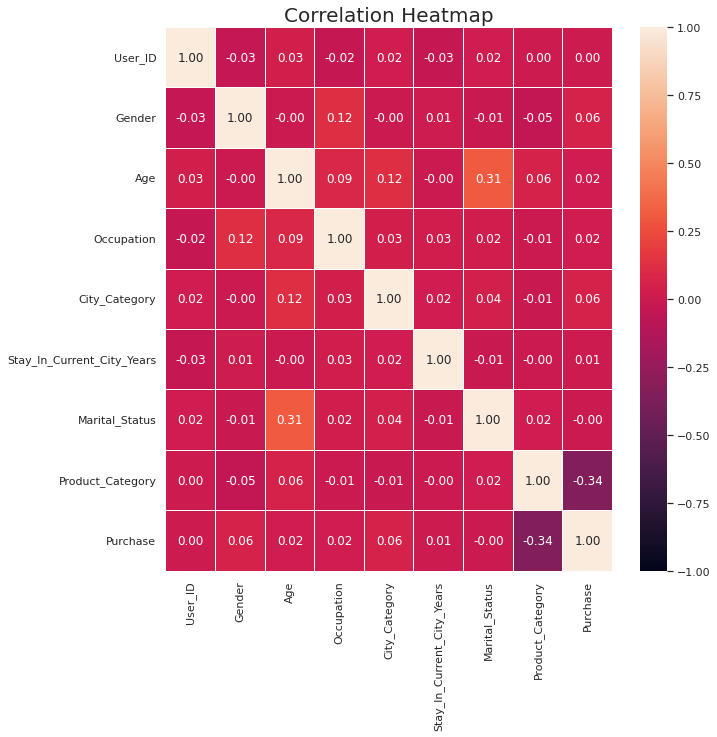

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set(color_codes = True)
sns.heatmap(walmart_df5.corr(), vmin=-1,vmax=1, ax=ax, annot = True, linewidths = 0.05, fmt ='0.2f')
plt.title("Correlation Heatmap",fontsize=20)
plt.show()

**Observations:**

- There is also some correlation between age and marital status which is in line with common sense.

- Unfortunately, there is no single feature that shows strong correlation with purchase directly, so we can understand this as that purchase depends on the ensemble of all features.



#### **Pair Plots**

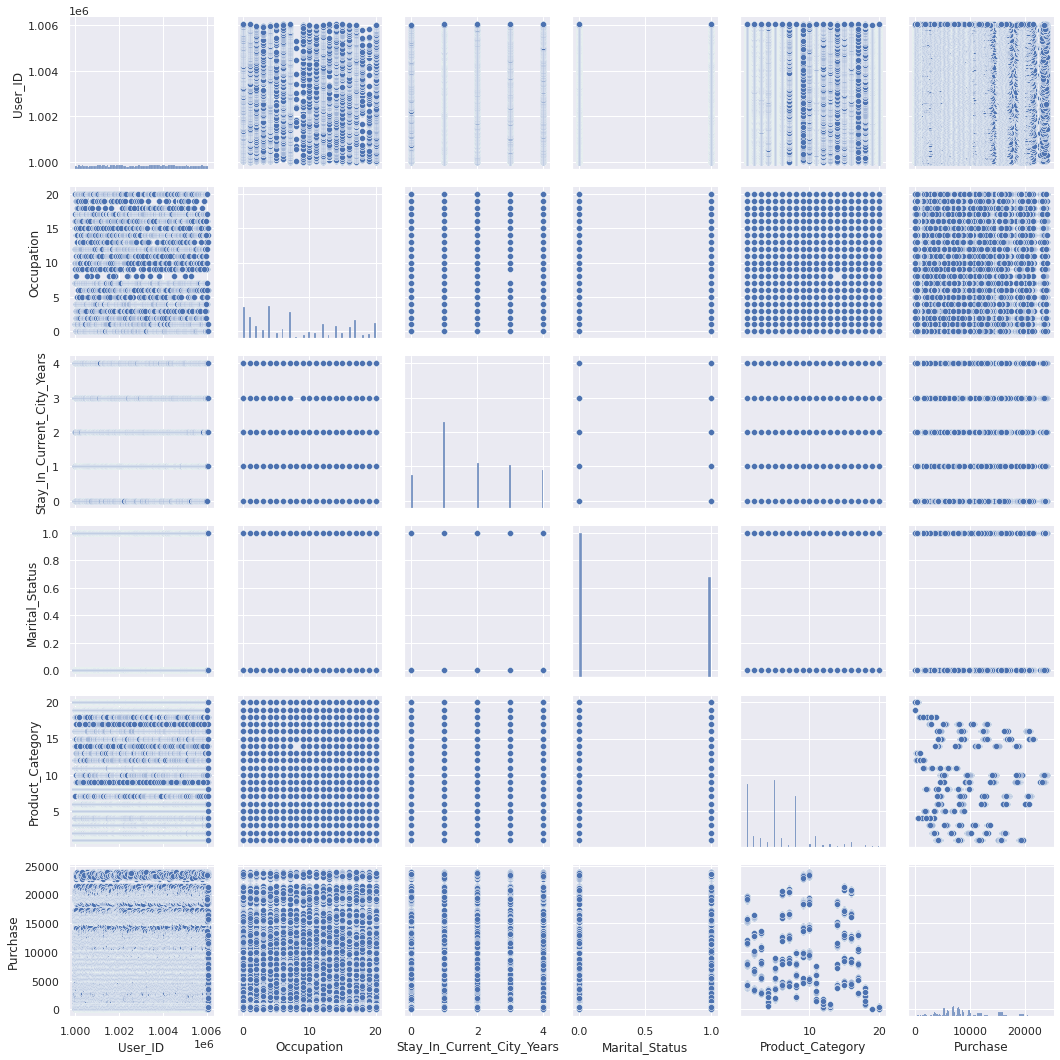

In [ ]:
sns.pairplot(walmart_df, hue = "Purchase")
plt.show()

# 2. Missing Value & Outlier Detection

## Missing Values

In [ ]:
walmart_df6 = walmart_df.copy()

In [ ]:
walmart_df6.shape

(550068, 10)

In [ ]:
# Missing value detection
walmart_df6.isna().sum() # No missing values detected in data frame

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## Outlier Detection
* Outliers detection using BoxPlots

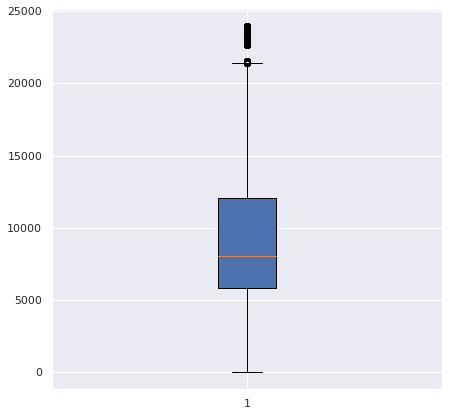

In [ ]:
#Box Plot of Purchase
walmart_df_na=walmart_df6.dropna()
box=plt.boxplot(walmart_df_na["Purchase"],vert=True,notch=False,patch_artist=True)

In [ ]:
#Lets check point which falls outside the whisker
value_point_outside_whisker=[item.get_ydata() for item in box["fliers"]]
value_point_outside_whisker=value_point_outside_whisker[0]

In [ ]:
value_point_outside_whisker.max(),value_point_outside_whisker.min()

(23961, 21401)

In [ ]:
grater_point=walmart_df6[walmart_df6["Purchase"]>=value_point_outside_whisker.min()]

In [ ]:
#Let's drop Outliers
walmart_df2=walmart_df6.drop(grater_point.index).reset_index()

**Obervation**
*   It's true that there are outliers in `Purchase` attribute, but they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

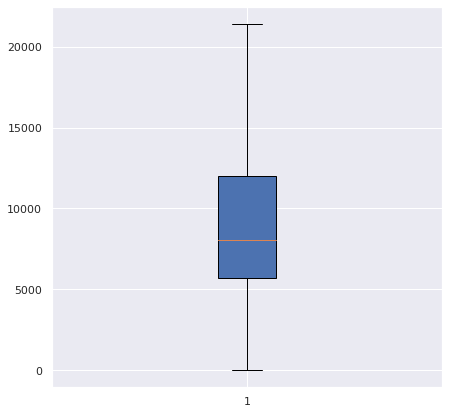

In [ ]:
#Box Plot of Purchase
box=plt.boxplot(walmart_df2["Purchase"],vert=True,notch=False,patch_artist=True)

In [ ]:
# Before removal of Outliers
walmart_df.shape

(550068, 10)

In [ ]:
# After removal of Outliers
walmart_df2.shape

(547391, 11)

It's true that there are outliers, but they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

# 3. Business Insights based on Non-Graphical and Visual Analysis:

## 1. Comments on the range of attributes

###### DONE WITH OBSERVATIONS IN THE VISUAL ANALYSIS - UNIVARIATE & BIVARIATE

## 2. Comments on the distribution of the variables and relationship between them

###### DONE WITH OBSERVATIONS IN THE VISUAL ANALYSIS - UNIVARIATE & BIVARIATE

## 3. Comments for each univariate and bivariate plot

###### DONE WITH OBSERVATIONS IN THE VISUAL ANALYSIS - UNIVARIATE & BIVARIATE

# 4. Answering questions:


**1. Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
# Average amount spend per customer for Male and Female
amt_df = walmart_df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avg_amt_df = amt_df.reset_index()
avg_amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [ ]:
# Gender wise value counts in avg_amt_df
avg_amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

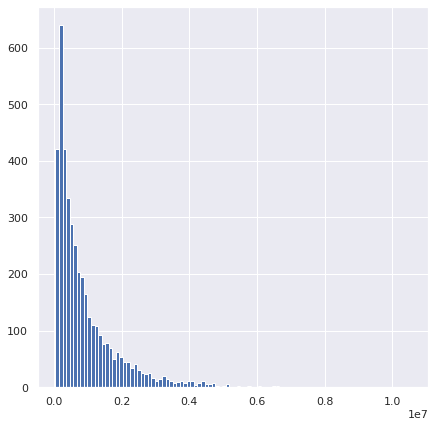

In [ ]:
# histogram of average amount spend for each customer - Male
avg_amt_df[avg_amt_df['Gender']=='M']['Purchase'].hist(bins=100)
plt.show()

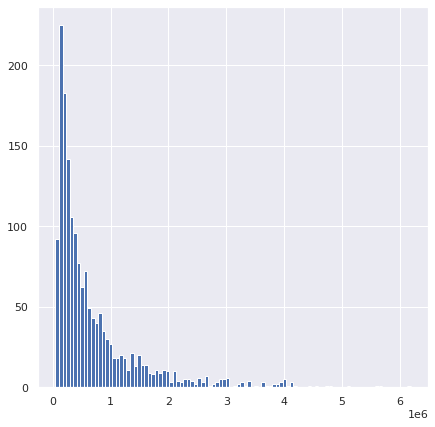

In [ ]:
# histogram of average amount spend for each customer - Female
avg_amt_df[avg_amt_df['Gender']=='F']['Purchase'].hist(bins=100)
plt.show()

In [ ]:
male_avg = avg_amt_df[avg_amt_df['Gender']=='M']['Purchase'].mean()
female_avg = avg_amt_df[avg_amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


**Observation**

- Male customers spend more money than female customers

- Most of the transactions were made by men.

**2. Confidence intervals and distribution of the mean of the expenses by female and male customers**

In [ ]:
male_df = avg_amt_df[avg_amt_df['Gender']=='M']
female_df = avg_amt_df[avg_amt_df['Gender']=='F']

In [ ]:
genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

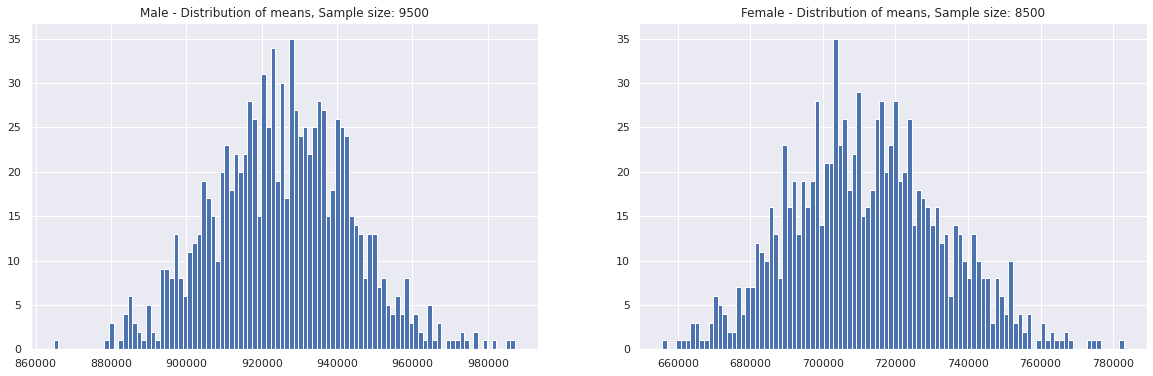



Population mean - Mean of sample means of amount spend for Male: 925408.28
Population mean - Mean of sample means of amount spend for Female: 712217.18

Male - Sample mean: 925344.40 Sample std: 985830.10
Female - Sample mean: 712024.39 Sample std: 807370.73


In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(male_means, bins=100)
axis[1].hist(female_means, bins=100)
axis[0].set_title("Male - Distribution of means, Sample size: 9500")
axis[1].set_title("Female - Distribution of means, Sample size: 8500")

plt.show()

print("\n")
print("Population mean - Mean of sample means of amount spend for Male: {:.2f}".format(np.mean(male_means)))
print("Population mean - Mean of sample means of amount spend for Female: {:.2f}".format(np.mean(female_means)))

print("\nMale - Sample mean: {:.2f} Sample std: {:.2f}".format(male_df['Purchase'].mean(), male_df['Purchase'].std()))
print("Female - Sample mean: {:.2f} Sample std: {:.2f}".format(female_df['Purchase'].mean(), female_df['Purchase'].std()))

**Observations:**

Now using the **Central Limit Theorem** for the **population** we can say that:
- Average amount spend by male customers is **9,25,408.28**
- Average amount spend by female customers is **7,12,217.18**

In [ ]:
male_margin_of_error_clt = 1.64*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.64*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (900471.15, 950217.65)
Female confidence interval of means: (679584.51, 744464.28)


Now we can infer about the population that, **90% of the times**:

- Average amount spend by male customer will lie in between: **(900471.15, 950217.65)**
- Average amount spend by female customer will lie in between: **(679584.51, 744464.28)**

In [ ]:
male_margin_of_error_clt = 1.96*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 1.96*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (895617.83, 955070.97)
Female confidence interval of means: (673254.77, 750794.02)


Now we can infer about the population that, **95% of the times**:

- Average amount spend by male customer will lie in between: **(895617.83, 955070.97)**
- Average amount spend by female customer will lie in between: **(673254.77, 750794.02)**

In [ ]:
male_margin_of_error_clt = 2.58*male_df['Purchase'].std()/np.sqrt(len(male_df))
male_sample_mean = male_df['Purchase'].mean()
male_lower_lim = male_sample_mean - male_margin_of_error_clt
male_upper_lim = male_sample_mean + male_margin_of_error_clt

female_margin_of_error_clt = 2.58*female_df['Purchase'].std()/np.sqrt(len(female_df))
female_sample_mean = female_df['Purchase'].mean()
female_lower_lim = female_sample_mean - female_margin_of_error_clt
female_upper_lim = female_sample_mean + female_margin_of_error_clt

print("Male confidence interval of means: ({:.2f}, {:.2f})".format(male_lower_lim, male_upper_lim))
print("Female confidence interval of means: ({:.2f}, {:.2f})".format(female_lower_lim, female_upper_lim))

Male confidence interval of means: (886214.53, 964474.27)
Female confidence interval of means: (660990.91, 763057.88)


Now we can infer about the population that, **99% of the times**:

- Average amount spend by male customer will lie in between: **(886214.53, 964474.27)**
- Average amount spend by female customer will lie in between: **(660990.91, 763057.88)**

**3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**



*   The confidence intervals of average male and female spendings are not overlapping.

*   Walmart can leverage this problem by taking sample dataset and apply this to whole population dataset by performing Central Limit Theorem and Confidence Intervals of 90%, 95%, or 99% by playing around with the width parameter by reporting those observations to Walmart.



**4. Results when the same activity is performed for Married vs Unmarried**

In [ ]:
amt_df = walmart_df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_amt_df = amt_df.reset_index()
avg_amt_df

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001
...,...,...,...
5886,1006036,1,4116058
5887,1006037,0,1119538
5888,1006038,0,90034
5889,1006039,1,590319


In [ ]:
avg_amt_df['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

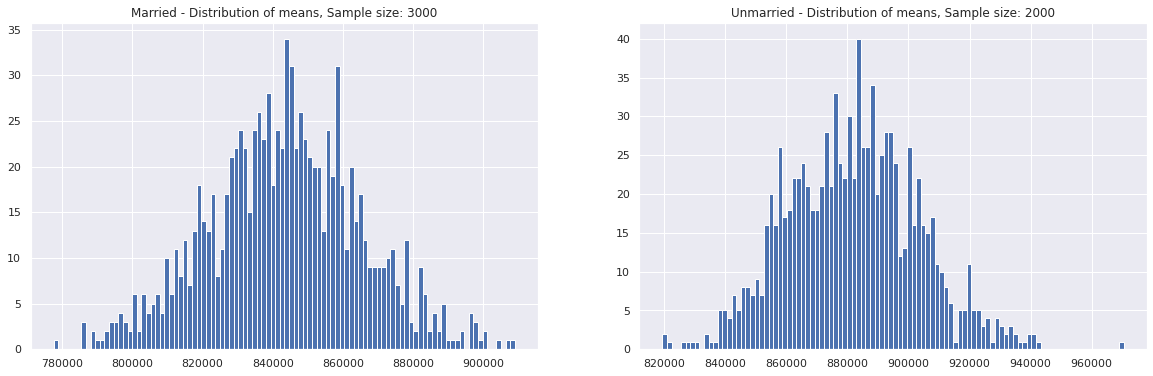



Population mean - Mean of sample means of amount spend for Married: 843308.18
Population mean - Mean of sample means of amount spend for Unmarried: 881711.68

Married - Sample mean: 843526.80 Sample std: 935352.12
Unmarried - Sample mean: 880575.78 Sample std: 949436.25


In [ ]:
married_samp_size = 3000
married_samp_size = 2000
num_repitions = 1000
married_means = []
unmarried_means = []

for _ in range(num_repitions):
    married_mean = avg_amt_df[avg_amt_df['Marital_Status']==1].sample(married_samp_size, replace=True)['Purchase'].mean()
    unmarried_mean = avg_amt_df[avg_amt_df['Marital_Status']==0].sample(married_samp_size, replace=True)['Purchase'].mean()

    married_means.append(married_mean)
    unmarried_means.append(unmarried_mean)


fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=100)
axis[1].hist(unmarried_means, bins=100)
axis[0].set_title("Married - Distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried - Distribution of means, Sample size: 2000")

plt.show()
print("\n")
print("Population mean - Mean of sample means of amount spend for Married: {:.2f}".format(np.mean(married_means)))
print("Population mean - Mean of sample means of amount spend for Unmarried: {:.2f}".format(np.mean(unmarried_means)))

print("\nMarried - Sample mean: {:.2f} Sample std: {:.2f}".format(avg_amt_df[avg_amt_df['Marital_Status']==1]['Purchase'].mean(), avg_amt_df[avg_amt_df['Marital_Status']==1]['Purchase'].std()))
print("Unmarried - Sample mean: {:.2f} Sample std: {:.2f}".format(avg_amt_df[avg_amt_df['Marital_Status']==0]['Purchase'].mean(), avg_amt_df[avg_amt_df['Marital_Status']==0]['Purchase'].std()))

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = avg_amt_df[avg_amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.64*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (812686.46, 874367.13)
Unmarried confidence interval of means: (853938.67, 907212.90)


Now we can infer about the population that, **90% of the times**:

- Married confidence interval of means: **(812686.46, 874367.13)**
- Unmarried confidence interval of means: **(853938.67, 907212.90)**

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = avg_amt_df[avg_amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (806668.83, 880384.76)
Unmarried confidence interval of means: (848741.18, 912410.38)


Now we can infer about the population that, **95% of the times**:

- Married confidence interval of means: **(806668.83, 880384.76)**
- Unmarried confidence interval of means: **(848741.18, 912410.38)**

In [ ]:
for val in ["Married", "Unmarried"]:

    new_val = 1 if val == "Married" else 0

    new_df = avg_amt_df[avg_amt_df['Marital_Status']==new_val]

    margin_of_error_clt = 2.58*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("{} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

Married confidence interval of means: (795009.68, 892043.91)
Unmarried confidence interval of means: (838671.05, 922480.51)


Now we can infer about the population that, **99% of the times**:

- Married confidence interval of means: **(795009.68, 892043.91)**
- Unmarried confidence interval of means: **(838671.05, 922480.51)**

**5. Results when the same activity is performed for Age**

In [ ]:
amt_df = walmart_df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avg_amt_df = amt_df.reset_index()
avg_amt_df

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001
...,...,...,...
5886,1006036,26-35,4116058
5887,1006037,46-50,1119538
5888,1006038,55+,90034
5889,1006039,46-50,590319


In [ ]:
avg_amt_df['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [ ]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = avg_amt_df[avg_amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

Now we can infer about the population that, **90% of the times**

In [ ]:

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avg_amt_df[avg_amt_df['Age']==val]

    margin_of_error_clt = 1.64*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {}, confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))


For age 26-35, confidence interval of means: (952320.12, 1026998.51)
For age 36-45, confidence interval of means: (832542.56, 926788.86)
For age 18-25, confidence interval of means: (810323.44, 899402.80)
For age 46-50, confidence interval of means: (726410.64, 858686.93)
For age 51-55, confidence interval of means: (703953.00, 822448.85)
For age 55+, confidence interval of means: (487192.99, 592201.50)
For age 0-17, confidence interval of means: (542553.13, 695182.50)


Now we can infer about the population that, **95% of the times**

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avg_amt_df[avg_amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {}, confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35, confidence interval of means: (945034.42, 1034284.21)
For age 36-45, confidence interval of means: (823347.80, 935983.62)
For age 18-25, confidence interval of means: (801632.78, 908093.46)
For age 46-50, confidence interval of means: (713505.63, 871591.93)
For age 51-55, confidence interval of means: (692392.43, 834009.42)
For age 55+, confidence interval of means: (476948.26, 602446.23)
For age 0-17, confidence interval of means: (527662.46, 710073.17)


Now we can infer about the population that, **99% of the times**

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avg_amt_df[avg_amt_df['Age']==val]

    margin_of_error_clt = 2.58*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {}, confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35, confidence interval of means: (930918.39, 1048400.25)
For age 36-45, confidence interval of means: (805532.95, 953798.47)
For age 18-25, confidence interval of means: (784794.60, 924931.63)
For age 46-50, confidence interval of means: (688502.19, 896595.37)
For age 51-55, confidence interval of means: (669993.82, 856408.03)
For age 55+, confidence interval of means: (457099.09, 622295.40)
For age 0-17, confidence interval of means: (498811.78, 738923.84)


# 5. Final Insights:

#### Actionable Insights:

- For `Age` feature, we observed that ~ 80% of the customer's who belong to the age group 25-40 (40%: 26-35, 18%: 18-25, 20%: 36-45) tend to spend the most.

- For `Gender` feature, ~75% of the number of purchases are made by Male customer's and rest of the 25% is done by female customer's. This tells us the Male consumers are the major contributors to the number of sales for the retail store.On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.
  - **Average amount** spend by **Male** customers: **9,25,408.28**
  - **Average amount** spend by **Female** customers: **7,12,217.18**

- When we combined `Purchase` and `Marital_Status` for analysis (60% are Single, 40% are Married). We came to know that Single Men spend the most during the Black Friday. It also tells that Men tend to spend less once they are married. It maybe because of the added responsibilities.

- There is an interesting column `Stay_In_Current_City_Years`, after analyzing this column we came to know the people who have spent 1 year in the city tend to spend the most. This is understandable as, people who have spent more than 4 years in the city are generally well settled and are less interested in buying new things as compared to the people new to the city, who tend to buy more (35% Staying in the city since 1 year, 18% since 2 years, 17% since 3 years).

- When examining the `City_Category` which city the product was purchased to our surprise, even though the city B is majorly responsible for the overall sales income, but when it comes to the above product, it majorly purchased in the city C.

- Total of 20 `product_categories` are there. `Product_Category` - `1, 5, 8, & 11` have highest purchasing frequency.

- There are 20 differnent types of `Occupation`'s in the city

#### Confidence Interval:

**Confidence Interval by Gender**

Now using the **Central Limit Theorem** for the **population**:

- Average amount spend by male customers is **9,25,408.28**
- Average amount spend by female customers is **7,12,217.18**

Now we can infer about the population that, **90% of the times**:

- Average amount spend by male customer will lie in between: **(900471.15, 950217.65)**
- Average amount spend by female customer will lie in between: **(679584.51, 744464.28)**

Now we can infer about the population that, **95% of the times**:

- Average amount spend by male customer will lie in between: **(895617.83, 955070.97)**
- Average amount spend by female customer will lie in between: **(673254.77, 750794.02)**

Now we can infer about the population that, **99% of the times**:

- Average amount spend by male customer will lie in between: **(886214.53, 964474.27)**
- Average amount spend by female customer will lie in between: **(660990.91, 763057.88)**


**Confidence Interval by Marital_Status**

Now we can infer about the population that, **90% of the times**:

- Married confidence interval of means: **(812686.46, 874367.13)**
- Unmarried confidence interval of means: **(853938.67, 907212.90)**

Now we can infer about the population that, **95% of the times**:

- Married confidence interval of means: **(806668.83, 880384.76)**
- Unmarried confidence interval of means: **(848741.18, 912410.38)**


Now we can infer about the population that, **99% of the times**:

- Married confidence interval of means: **(795009.68, 892043.91)**
- Unmarried confidence interval of means: **(838671.05, 922480.51)**


**Confidence Interval by Age**

Now we can infer about the population that, **90% of the times**:

1. For **age 26-35**, confidence interval of means: **(952320.12, 1026998.51)**
2. For **age 36-45**, confidence interval of means: **(832542.56, 926788.86)**
3. For **age 18-25**, confidence interval of means: **(810323.44, 899402.80)**
4. For **age 46-50**, confidence interval of means: **(726410.64, 858686.93)**
5. For **age 51-55**, confidence interval of means: **(703953.00, 822448.85)**
6. For **age 55+**, confidence interval of means: **(487192.99, 592201.50)**
7. For **age 0-17**, confidence interval of means: **(542553.13, 695182.50)**


Now we can infer about the population that, **95% of the times**:

1. For **age 26-35**, confidence interval of means: **(945034.42, 1034284.21)**
2. For **age 36-45**, confidence interval of means: **(823347.80, 935983.62)**
3. For **age 18-25**, confidence interval of means: **(801632.78, 908093.46)**
4. For **age 46-50**, confidence interval of means: **(713505.63, 871591.93)**
5. For **age 51-55**, confidence interval of means: **(692392.43, 834009.42)**
6. For **age 55+**, confidence interval of means: **(476948.26, 602446.23)**
7. For **age 0-17**, confidence interval of means: **(527662.46, 710073.17)**

Now we can infer about the population that, **99% of the times**:

1. For **age 26-35**, confidence interval of means: **(930918.39, 1048400.25)**
2. For **age 36-45**, confidence interval of means: **(805532.95, 953798.47)**
3. For **age 18-25**, confidence interval of means: **(784794.60, 924931.63)**
4. For **age 46-50**, confidence interval of means: **(688502.19, 896595.37)**
5. For **age 51-55**, confidence interval of means: **(669993.82, 856408.03)**
6. For **age 55+**, confidence interval of means: **(457099.09, 622295.40)**
7. For **age 0-17**, confidence interval of means: **(498811.78, 738923.84)**



# 6. Recommendations:

#### Recommendations:


1. `Men` spent more money than women, So company should focus on retaining the female customers and getting more female customers.

2. `Product_Category - 1, 5, 8, & 11` have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.

3. `Unmarried` customers spend more money than married customers, So company should focus on acquisition of married customers.

4. Customers in the `age 25-40` spend more money than the others, So company should focus on acquisition of customers of other age groups.

5. The tier-2 city called `B` has the highest number of population, management should open more outlets in the tier-1 and tier-2 cities like A and C in order to increase the buisness.
